<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/ML_ClassificationDTree_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.> Decision-Tree / DTree-Classifier in Machine Learning For Classification Problem - Wine Dataset ---->**

In [ ]:
#import all the necessary libraries --->

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/wine.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

In [ ]:
df.shape

(178, 14)

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# perform train-test split -->
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis='columns')
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Data Scaling -->
scaler = MinMaxScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

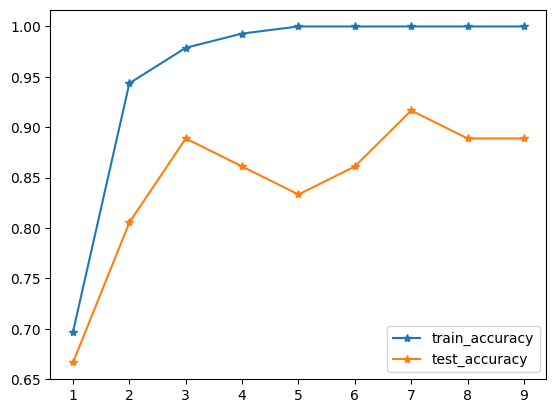

In [ ]:
# use loop for avoiding overfitting condition -->
from sklearn.tree import DecisionTreeClassifier
train_accuracy = []
test_accuracy = []

for i in range(1,10):
  dt = DecisionTreeClassifier(max_depth=i, criterion='entropy')
  dt.fit(X_trainScaled, y_train)

  train_accuracy.append(dt.score(X_trainScaled, y_train))
  test_accuracy.append(dt.score(X_testScaled, y_test))

# plot it -->
plt.plot(range(1,10), train_accuracy, label='train_accuracy',marker='*')
plt.plot(range(1,10), test_accuracy, label='test_accuracy',marker='*')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier -->
dt = DecisionTreeClassifier(max_depth=4, criterion='gini')                # if entropy = 0 -> pure subset and if entropy != 0 -> impure subset
dt.fit(X_trainScaled, y_train)                                            # target of both formula for gini-index and entropy is to obtain pure-subset

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Like in KNN there is only one parameter {i.e. n_neighbours} but in Dtree there are so many parameters present ---> entropy , gini-index many more in order to choose the appropiate one for better accuracy and pure subset we use GridSearchCV
# GridSearchCV method --> crossValidation
from sklearn.model_selection import GridSearchCV
grid_par = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10)
}

grid_search = GridSearchCV(estimator=dt, param_grid=grid_par, cv=5)
grid_search.fit(X_trainScaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [ ]:
# print training and testing accuracy --->
print(dt.score(X_trainScaled, y_train))               # overfittting case model
print(dt.score(X_testScaled, y_test))

0.9859154929577465
0.8333333333333334


In [ ]:
# make prediction on testing data -->
y_pred = dt.predict(X_testScaled)
y_pred

array([0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8333333333333334
[[14  3  0]
 [ 1 10  0]
 [ 1  1  6]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.71      0.91      0.80        11
           2       1.00      0.75      0.86         8

    accuracy                           0.83        36
   macro avg       0.86      0.83      0.84        36
weighted avg       0.85      0.83      0.84        36



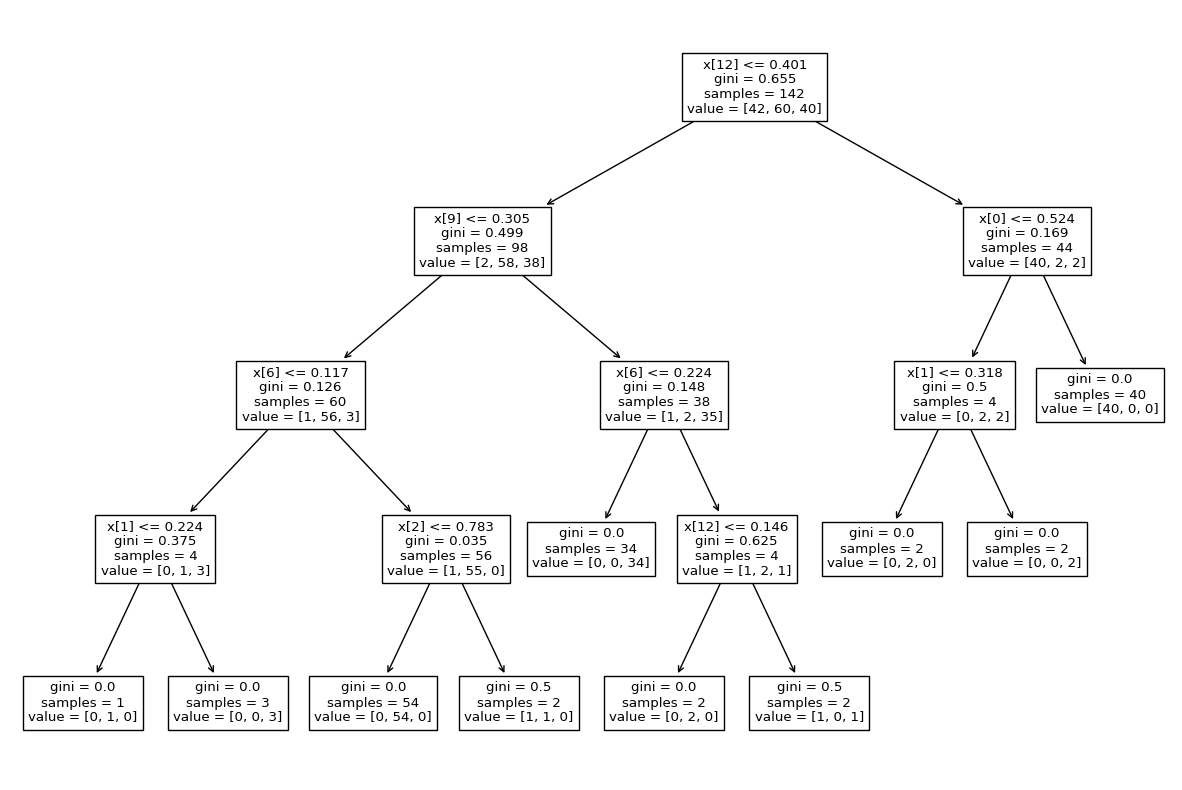

In [ ]:
# now create the desicion tree formed --->
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt)
plt.show()